# Сборный проект 2

Компания "Работа с заботой" помогает биснесу оптимизировать управление персоналом. Сотрудники создают модели машинного обучения, на основе которых клиенты компании принимают решения.

Исследование предполагает предсказать удовлетворённость сотрудников и склонность к увольнению.

Цель исследования

Необходимо решить следующие задачи:
1. Составить модель машинного обучения, которая предскажет удовлетворённость сотрудника
2. Составить модель, которая определит уволится сотрудник или нет

План исследования:

*Задача 1.*

***Часть 1. Загрузка данных***

***Часть 2. Предобработка данных***

***Часть 3. Исследовательский анализ данных***
* Количетсвенные признаки
* Категориальные признаки
* Диаграмма рассеяния

***Часть 4. Подготовка данных***

***Часть 5. Обучение моделей***
* Выделение признаков и создание метрики
* Модель SVR
* Модель дерева решений

***Часть 6. Промежуточные выводы***

*Задача 2.*

***Часть 1. Загрузка данных***

***Часть 2. Предобработка данных***

***Часть 3. Исследовательский анализ данных***
* Составление портрета уволившегося сотрудника
* Проверка удовлетворённости сотрудника

***Часть 4. Добавление нового признака***

***Часть 5. Подготовка данных***

***Часть 6. Составление моделей***

***Часть 7. Выводы***

Перед решением загрузим нужные библиотеки

In [1]:
#pandas для работы с датафреймами
import pandas as pd
#математические библиотеки
import phik
import math
import numpy as np
#графики
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder
)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    make_scorer
)

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

#import shap

# Задача 1

## Часть 1. Загрузка данных

Загрузим следующие датафреймы

Датафрейм с тренировочной выборкой

In [2]:
try:
    df_train_job_satisfaction_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv') # Это путь на локальное хранилище ЯндексПрактикума
except:
    try:
        df_train_job_satisfaction_rate = pd.read_csv('D://YandexPracticum//data//train_job_satisfaction_rate.csv') # Это путь для файла на локальном компьютере (надо указать свой для каждого компьютера)
    except:
        df_train_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv') # Это путь для файла на сервере Яндекс

In [3]:
df_train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Проверим датафрейм методом info

In [4]:
df_train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Датафрейм с входными признаками тестовой выборки

In [5]:
try:
    df_test_features = pd.read_csv('/datasets/test_features.csv') # Это путь на локальное хранилище ЯндексПрактикума
except:
    try:
        df_test_features = pd.read_csv('D://YandexPracticum//data//test_features.csv') # Это путь для файла на локальном компьютере (надо указать свой для каждого компьютера)
    except:
        df_test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv') # Это путь для файла на сервере Яндекс

In [6]:
df_test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [7]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Датафрейм с целевым признаком тестовой выборки

In [8]:
try:
    df_test_target_job_satisfaction_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv') # Это путь на локальное хранилище ЯндексПрактикума
except:
    try:
        df_test_target_job_satisfaction_rate = pd.read_csv('D://YandexPracticum//data//test_target_job_satisfaction_rate.csv') # Это путь для файла на локальном компьютере (надо указать свой для каждого компьютера)
    except:
        df_test_target_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/test_target_job_satisfaction_rate.csv') # Это путь для файла на сервере Яндекс

In [9]:
df_test_target_job_satisfaction_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [10]:
df_test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Данные загрузились как надо. Названия столбцов в змеином регистре. Метод info показал, что в датафреймах есть пропущенные значения. В датафрейме с целевым тестовом признаком пропусков нет.

## Часть 2. Предобработка данных

Рассмотрим датафрейм с тренировочной выборкой методом info

In [11]:
df_train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


В кололках dept и level имеются пропуски, заполним их в пайплайне.

Для поисков неверно указанных значений в колонках с типом данных object проверим уникальные значения.

In [12]:
for column in df_train_job_satisfaction_rate.select_dtypes(include=['object']).columns:
    print(column, ':', df_train_job_satisfaction_rate[column].unique())

dept : ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level : ['junior' 'middle' 'sinior' nan]
workload : ['medium' 'high' 'low']
last_year_promo : ['no' 'yes']
last_year_violations : ['no' 'yes']


С названиями всё нормально, если не считать пропущенные значения.

Проверим на дубликаты.

In [13]:
duplicates_rate = df_train_job_satisfaction_rate[df_train_job_satisfaction_rate.duplicated()]
duplicates_rate.sum()

id                       0.0
dept                     0.0
level                    0.0
workload                 0.0
employment_years         0.0
last_year_promo          0.0
last_year_violations     0.0
supervisor_evaluation    0.0
salary                   0.0
job_satisfaction_rate    0.0
dtype: float64

Рассмотрим датафрейм df_test_features

In [14]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [15]:
duplicates_features = df_test_features[df_test_features.duplicated()]
duplicates_features.sum()

id                       0.0
dept                     0.0
level                    0.0
workload                 0.0
employment_years         0.0
last_year_promo          0.0
last_year_violations     0.0
supervisor_evaluation    0.0
salary                   0.0
dtype: float64

Пропуски заполним в пайплайнах, как это требует задание.

Рассмотрим уникальные значения колонок с типом данных object

In [16]:
for column in df_test_features.select_dtypes(include=['object']).columns:
    print(column, ':', df_test_features[column].unique())

dept : ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level : ['junior' 'middle' 'sinior' nan]
workload : ['medium' 'low' 'high' ' ']
last_year_promo : ['no' 'yes']
last_year_violations : ['no' 'yes']


Помимо пропусков имеются незаполненные значения. Найдём их.

In [17]:
df_test_features.loc[df_test_features['dept'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [18]:
df_test_features.loc[df_test_features['workload'] == ' ']

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


Приравняем эти значения к пропущенным.

In [19]:
df_test_features.loc[df_test_features['dept'] == ' ', 'dept'] = np.nan

In [20]:
df_test_features.loc[df_test_features['workload'] == ' ', 'workload'] = np.nan

Рассмотрим датафрейм df_test_target_job_satisfaction_rate

In [21]:
df_test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Всего 2000 значений, как и в df_test_features

## Часть 3. Исследовательский анализ данных

### Тренировочная выборка

#### Количественные признаки

Рассматривать будем только датафрейм df_train_job_satisfaction_rate как тренировочную выборку.

Построим гистограмму длительности работы в компании.

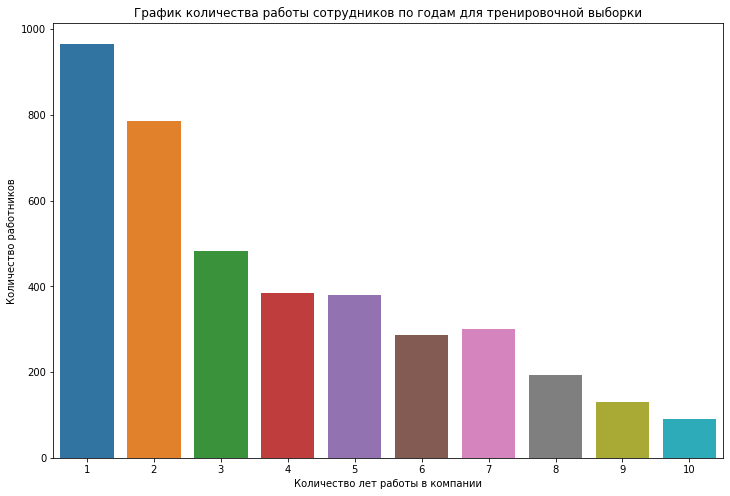

In [22]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_train_job_satisfaction_rate, x='employment_years')
ax.set_xlabel('Количество лет работы в компании')
ax.set_ylabel('Количество работников')
plt.title('График количества работы сотрудников по годам для тренировочной выборки');

Большинство работников работают в компании 1 или 2 года.

Гистограмма для оценки качества работы руководителем.

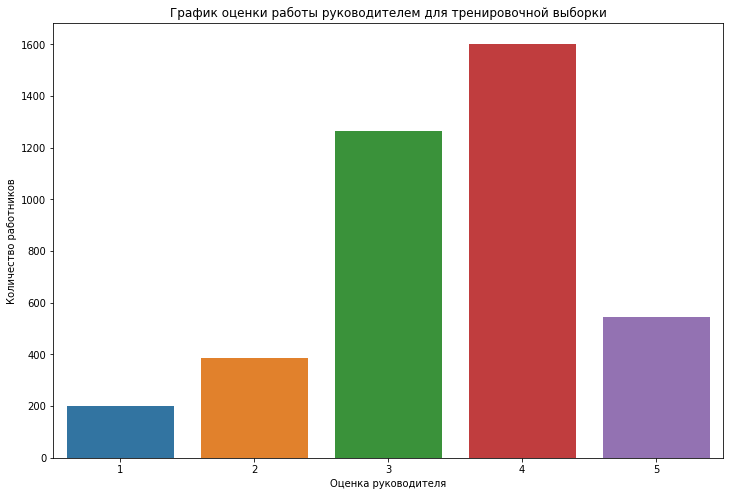

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_train_job_satisfaction_rate, x='supervisor_evaluation')
ax.set_xlabel('Оценка руководителя')
ax.set_ylabel('Количество работников')
plt.title('График оценки работы руководителем для тренировочной выборки');

Большинство работников имеют оценку 3 или 4, меньше 5, ещё меньше 2 и 1.

Гистограмма для зарплаты.

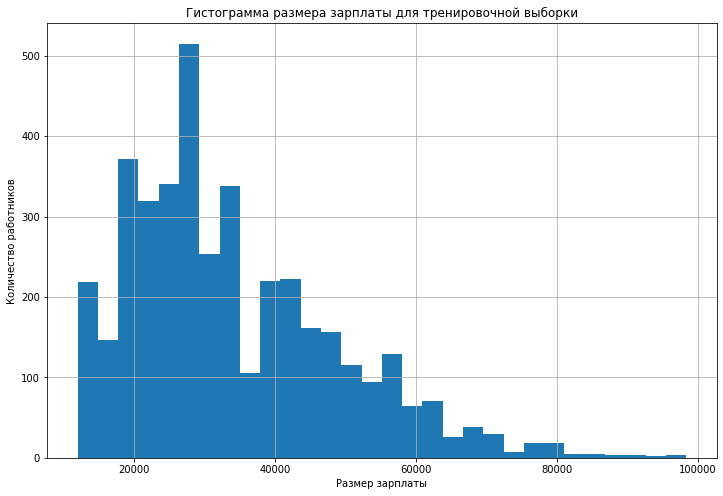

In [24]:
ax = df_train_job_satisfaction_rate['salary'].hist(
    bins = 30,
    figsize=(12, 8),
    grid=True
)
ax.set_xlabel('Размер зарплаты')
ax.set_ylabel('Количество работников')
plt.title('Гистограмма размера зарплаты для тренировочной выборки');

Средняя зарплата около 30000 рублей.

Необходимо выбрать как именно масштабировать данные: с помощью стандартизации или нормализации. Для этого нужно решить что нам важнее: единичная дисперсия или точно оценить минимальное и максимальное значение. Распределение признаков не похоже на нормальное, поэтому лучше использовать MinMaxScaler.

#### Категориальные признаки

Построим pie-диаграммы категориальных признаков.

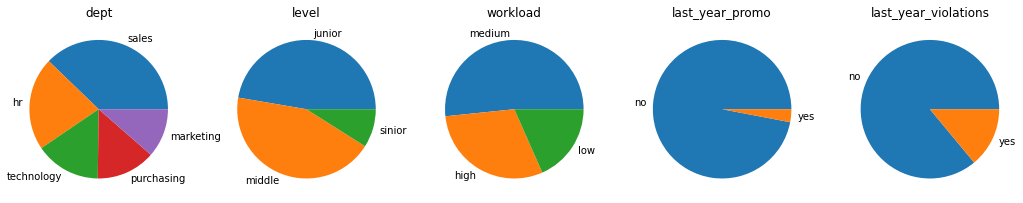

In [25]:
cat_signs = df_train_job_satisfaction_rate.select_dtypes(include=['object']).columns
df_train_job_satisfaction_rate_1 = df_train_job_satisfaction_rate.dropna()
plt.figure(figsize=[18, 12])

for i, cat_sign in enumerate(cat_signs):
    #print(df_train_job_satisfaction_rate[cat_sign].value_counts())
    #print(df_train_job_satisfaction_rate[cat_sign].unique())
    plt.subplot(1, 5, i+1)
    plt.pie(
        df_train_job_satisfaction_rate_1[cat_sign].value_counts(),
        labels=df_train_job_satisfaction_rate_1[cat_sign].unique(), radius=1)
    plt.title(cat_sign)

#### Матрица корреляции

Построим матрицу корреляции между всеми признаками

In [26]:
interval_cols = ['salary', 'job_satisfaction_rate']

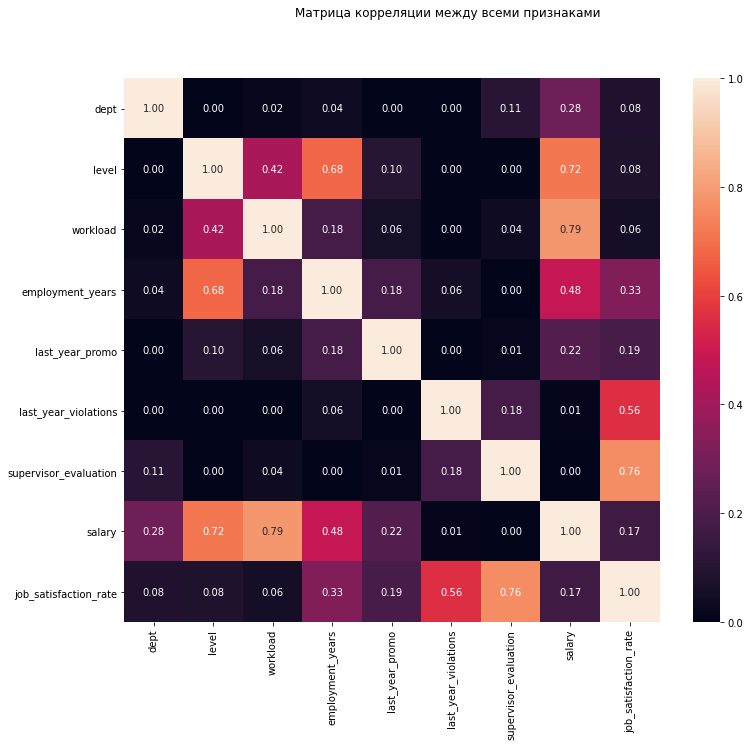

In [27]:
cm1 = df_train_job_satisfaction_rate.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm1, annot=True, fmt='.2f');

### Тестовая выборка

#### Количественные признаки

Построим график работы в компании для тестовой выборки

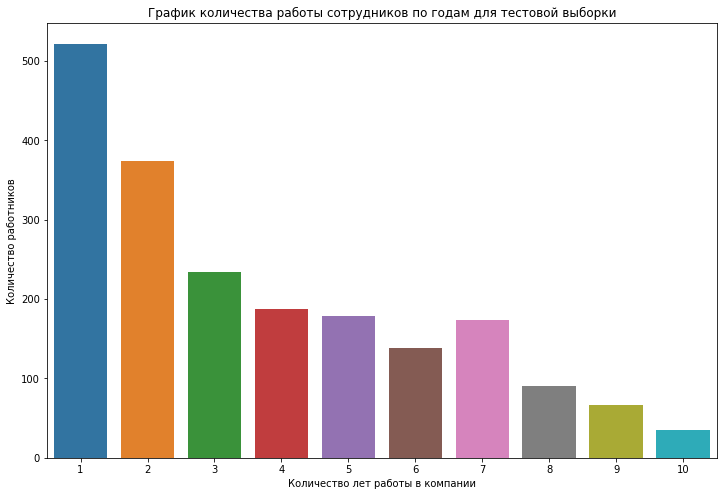

In [28]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_test_features, x='employment_years')
ax.set_xlabel('Количество лет работы в компании')
ax.set_ylabel('Количество работников')
plt.title('График количества работы сотрудников по годам для тестовой выборки');

График показывает, что разница в количестве для тренировочной и тестовой выборок незначительна.

Построим график оценки руководителем для тествой выборки.

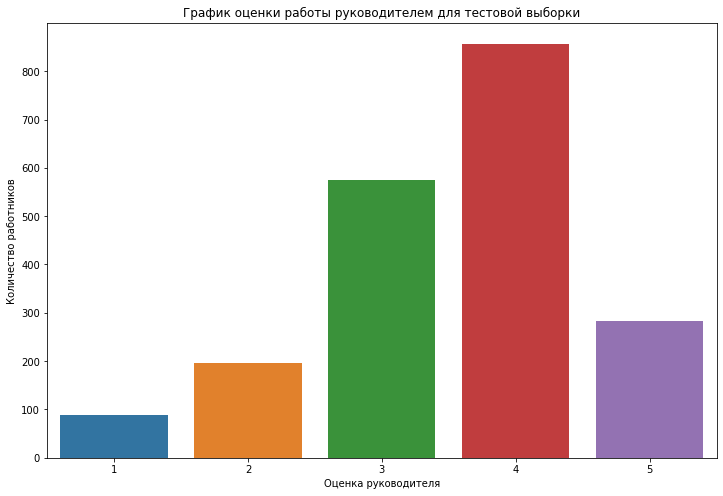

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_test_features, x='supervisor_evaluation')
ax.set_xlabel('Оценка руководителя')
ax.set_ylabel('Количество работников')
plt.title('График оценки работы руководителем для тестовой выборки');

Здесь расхождения незначительны, как и для графика количества работы в компании.

Построим гистограмму зарплаты.

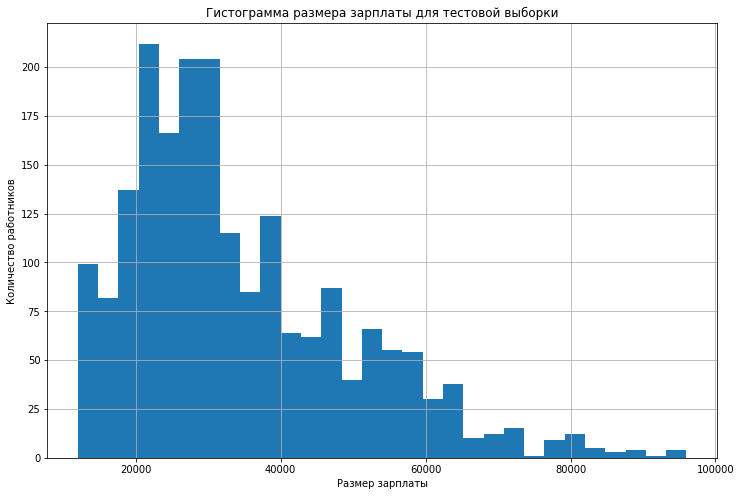

In [30]:
ax = df_test_features['salary'].hist(
    bins = 30,
    figsize=(12, 8),
    grid=True
)
ax.set_xlabel('Размер зарплаты')
ax.set_ylabel('Количество работников')
plt.title('Гистограмма размера зарплаты для тестовой выборки');

Для тестовой выборки размер заработной платы больше у значений около 20000, значение около 30000 такое же.

#### Категориальные признаки

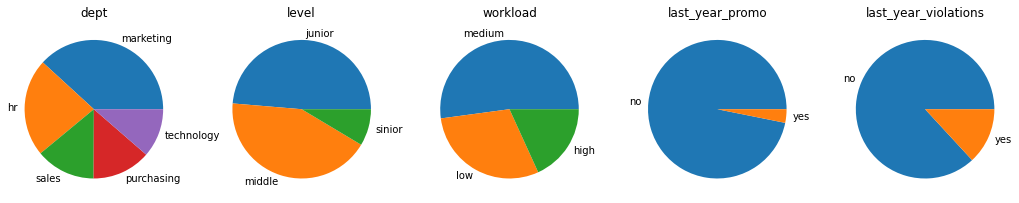

In [31]:
cat_signs = df_test_features.select_dtypes(include=['object']).columns
df_train_job_satisfaction_rate_2 = df_test_features.dropna()
plt.figure(figsize=[18, 12])

for i, cat_sign in enumerate(cat_signs):
    #print(df_train_job_satisfaction_rate[cat_sign].value_counts())
    #print(df_train_job_satisfaction_rate[cat_sign].unique())
    plt.subplot(1, 5, i+1)
    plt.pie(
        df_train_job_satisfaction_rate_2[cat_sign].value_counts(),
        labels=df_train_job_satisfaction_rate_2[cat_sign].unique(), radius=1)
    plt.title(cat_sign)

Распределение категориальных признаков такое же, как и для тренировочной выборки.

### Диаграмма рассеяния

На основе исследовательского анализа данных необходимо выбрать линейную модель: линейную регрессию, метод опорных векторов или kNN. Для этого построим диаграммы рассеяния, по оси $x$ отложив целевой признак, а по оси $y$ количественные переменные. Строить диаграммы по каждому признаку не имеет смысла, так как их будет слишком много, поэтому надо отобрать несколько признаков, которые важнее других. Сильнее всего на целевой признак влияет зарплата и уровень нагруженности, поэтому построим диаграммы по этим признакам.

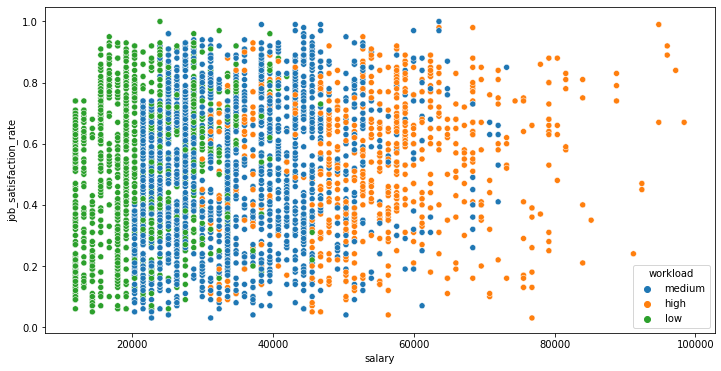

In [32]:
plt.figure(figsize=[12, 6])
sns.scatterplot(data=df_train_job_satisfaction_rate, y='job_satisfaction_rate', x='salary', hue='workload');

In [33]:
df_train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


## Часть 4. Подготовка данных

Для подготовки данных будем использовать пайплайны.

Создадим три списка с названиями для OHE, ORD и числовыми переменными.

In [34]:
ohe_columns = ['last_year_promo', 'last_year_violations', 'dept']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

Создадим пайплайн для кодировщика OneHotEncoder.

In [35]:
#почему-то тут выходит ошибка когда я указываю sparse_output=False
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error')) 
    ]
    )

Создадим пайплайн для кодировщика OrdinalEncoder.

In [36]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'high', 'low']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Создадим пайплайн для обработки данных.

In [37]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

## Часть 5. Обучение моделей

### Выделение признаков и создание метрики.

Выделим входные и целевые признаки.

In [38]:
X_train_1 = df_train_job_satisfaction_rate.drop(columns=['id', 'job_satisfaction_rate'])
y_train_1 = df_train_job_satisfaction_rate['job_satisfaction_rate']

Введём метрику SMAPE.

In [39]:
def smape_metric(y_test, y_pred):
    return 100/len(y_pred) * np.sum(2 * (np.abs(y_pred - y_test)) / (np.abs(y_pred) + np.abs(y_test)))

In [40]:
smape_scorer = make_scorer(smape_metric, greater_is_better=False)

Выделим тестовую выборку, отсортированную по id.

In [41]:
X_test_1 = df_test_features.sort_values(by=['id'])
X_test_1.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1172,100298,hr,junior,low,2,no,no,4,19200
852,100480,marketing,junior,low,4,no,no,4,16800
848,100503,purchasing,middle,high,5,no,no,4,55200
524,100610,sales,middle,medium,5,no,no,4,43200
476,100692,sales,middle,high,6,no,no,4,48000


In [42]:
df_test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [43]:
y_test_1 = df_test_target_job_satisfaction_rate.sort_values(by=['id'])
y_test_1 = y_test_1['job_satisfaction_rate']

### Обучение моделей

Создадим пайплайн с моделью.

In [44]:
pipe_final_1 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=42)
    )
])

Создадим список параметров для поиска лучшей модели дерева решений.

In [45]:
param_grid_1 = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 10),
        #'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        #'models__C': range(1, 5),
        #'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

]


Найдём лучшую метрику методом GridSearchCV.

In [46]:
gs_1 = GridSearchCV(
    pipe_final_1,
    param_grid_1,
    n_jobs=-1,
    cv=5,
    scoring=smape_scorer,
    error_score='raise'
)

In [96]:
gs_1.fit(X_train_1, y_train_1)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['last_year_promo',
                                                                          'last_year_violations',
                                                                          'dept']),
    

Выберем лучшую модель.

In [48]:
model_tree = gs_1.best_estimator_

In [49]:
gs_1.best_score_

-14.443021340892988

Сделаем предсказание.

In [50]:
y_pred_tree_1 = model_tree.predict(X_test_1.drop(columns=['id']))

Найдём SMAPE.

In [51]:
smape_metric(y_test_1, y_pred_tree_1)

13.641917570828333

Метрика получилась меньше 15.

## Часть 6. Промежуточные выводы

Были рассмотрены две модели, одна линейная, другая дерево решений. Линейные модели ограничены, поэтому её предсказание получилось хуже, в то время как у дерева решений можно выбирать гиперпараметры и на их основе выбирать лучшую метрику. Значение SMAPE получилось приемлимым, что говорит о хорошей работе модели.

# Задача 2.

## Часть 1. Загрузка данных

Загрузим датафрейм с тренировочной выборкой.

In [52]:
try:
    df_train_quit = pd.read_csv('/datasets/train_quit.csv') # Это путь на локальное хранилище ЯндексПрактикума
except:
    try:
        df_train_quit = pd.read_csv('D://YandexPracticum//data//train_quit.csv') # Это путь для файла на локальном компьютере (надо указать свой для каждого компьютера)
    except:
        df_train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv') # Это путь для файла на сервере Яндекс

In [53]:
df_train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [54]:
df_train_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [55]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Данные с тестовой выборки у нас уже есть, это датафрейм df_test_features.

Загрузим целевой признак тестовой выборки.

In [56]:
try:
    df_test_target_quit = pd.read_csv('/datasets/test_target_quit.csv') # Это путь на локальное хранилище ЯндексПрактикума
except:
    try:
        df_test_target_quit = pd.read_csv('D://YandexPracticum//data//test_target_quit.csv') # Это путь для файла на локальном компьютере (надо указать свой для каждого компьютера)
    except:
        df_test_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv') # Это путь для файла на сервере Яндекс

In [57]:
df_test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [58]:
df_test_target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Датафреймы загрузились как надо, столбцы в змеином регистре. Метод info показал, что пропусков нет. 

## Часть 2. Предобработка данных

Рассмотрим датафрейм с тренировочной выборкой методом info.

In [59]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Пропусков нет, проверим уникальные значения столбцов с типом данных object.

In [60]:
for column in df_train_quit.select_dtypes(include=['object']).columns:
    print(column, ':', df_train_quit[column].unique())

dept : ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level : ['middle' 'junior' 'sinior']
workload : ['high' 'medium' 'low']
last_year_promo : ['no' 'yes']
last_year_violations : ['no' 'yes']
quit : ['no' 'yes']


Опечаток нет.

Проверим на дубликаты.

In [61]:
df_train_quit[df_train_quit.duplicated()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit


Дубликатов нет.

## Часть 3. Исследовательский анализ данных

### Исследовательский анализ данных

Проведём исследовательский анализ данных аналогично первой задаче.

Создадим два датафрейма, в первом будут уволившиеся работники, во втором нет.

In [62]:
df_train_quit_no = df_train_quit.query('quit == "no"')
df_train_quit_no.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
4,910140,marketing,junior,medium,2,no,no,5,25200,no
6,417070,technology,middle,medium,8,no,no,2,44400,no


In [63]:
df_train_quit_yes = df_train_quit.query('quit == "yes"')
df_train_quit_yes.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


Посмотрим, сколько работников уволилось, а сколько осталось.

In [64]:
len(df_train_quit_no)

2872

In [65]:
len(df_train_quit_yes)

1128

Найдём долю уволившихся

In [66]:
len(df_train_quit_yes) / len(df_train_quit)

0.282

Получается, уволилось примерно 28\% сотрудников

Будем рассматривать тренировочную выборку, тестовую мы рассмотрели выше.

#### Количественные признаки

Построим график время работы сотрудников в годах для уволившихся и неуволившихся

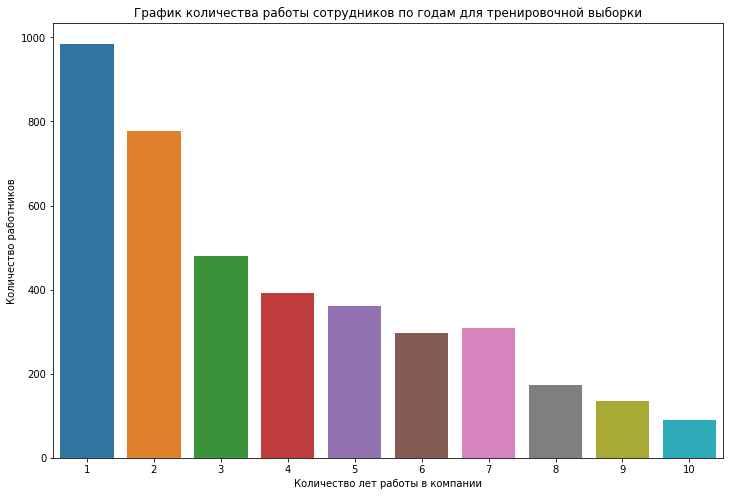

In [67]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_train_quit, x='employment_years')
ax.set_xlabel('Количество лет работы в компании')
ax.set_ylabel('Количество работников')
plt.title('График количества работы сотрудников по годам для тренировочной выборки');

График

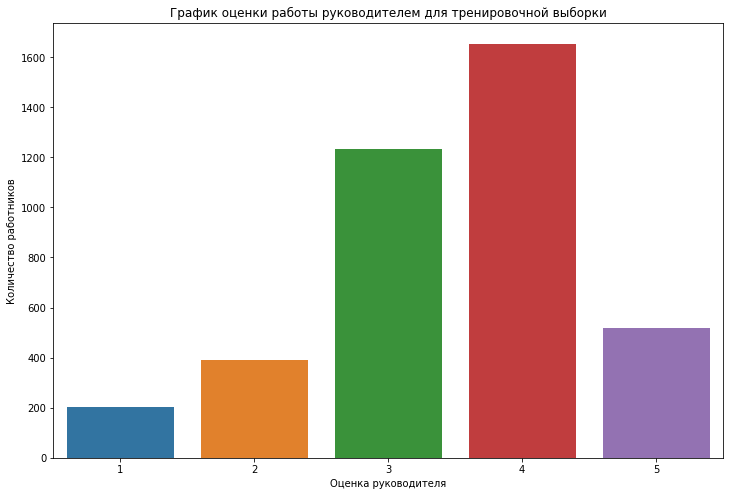

In [68]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_train_quit, x='supervisor_evaluation')
ax.set_xlabel('Оценка руководителя')
ax.set_ylabel('Количество работников')
plt.title('График оценки работы руководителем для тренировочной выборки');

Построим гистограмму заработной платы.

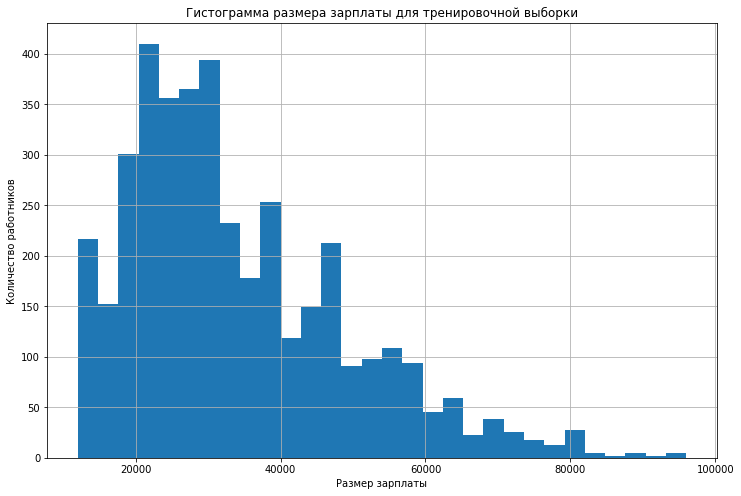

In [69]:
ax = df_train_quit['salary'].hist(
    bins = 30,
    figsize=(12, 8),
    grid=True
)
ax.set_xlabel('Размер зарплаты')
ax.set_ylabel('Количество работников')
plt.title('Гистограмма размера зарплаты для тренировочной выборки');

#### Категориальные признаки

Составим pie-диаграммы для категориальных признаков.

In [70]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


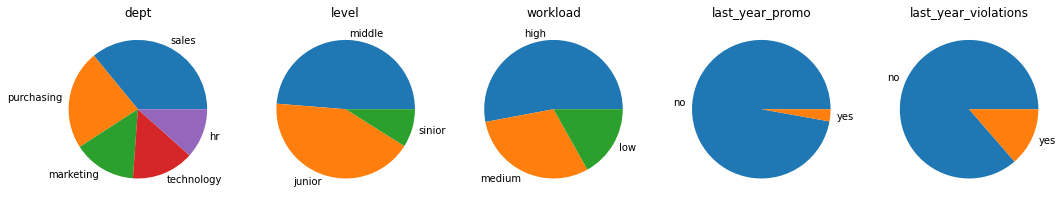

In [71]:
df_train_quit_1 = df_train_quit.dropna().drop(columns=['quit'])
cat_signs = df_train_quit_1.select_dtypes(include=['object']).columns
plt.figure(figsize=[18, 12])

for i, cat_sign in enumerate(cat_signs):
    plt.subplot(1, len(cat_signs), i+1)
    plt.pie(
        df_train_quit_1[cat_sign].value_counts(),
        labels=df_train_quit_1[cat_sign].unique(), radius=1)
    plt.title(cat_sign)

In [72]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


#### Матрица корреляции

In [73]:
interval_cols

['salary', 'job_satisfaction_rate']

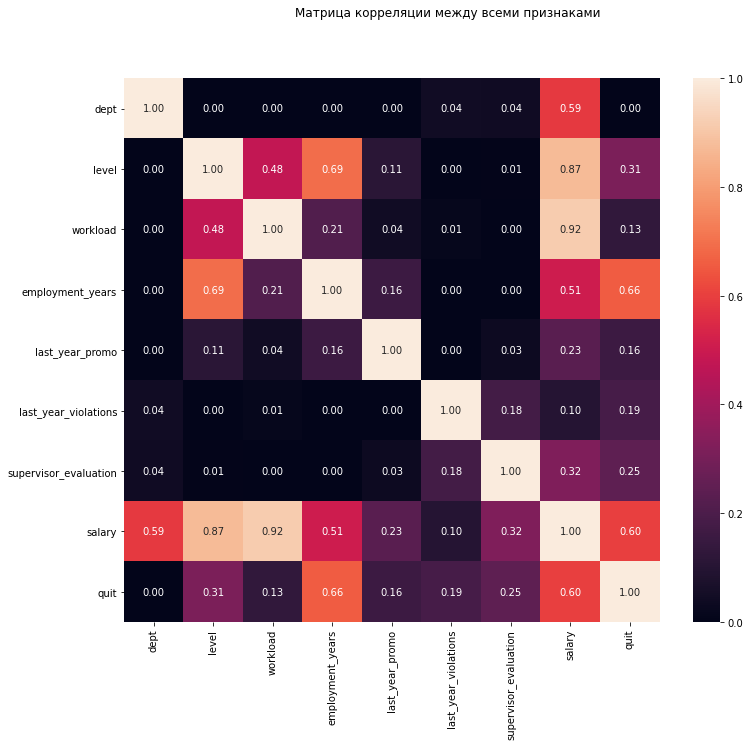

In [74]:
cm2 = df_train_quit.drop('id', axis=1).phik_matrix(interval_cols='salary')

plt.figure(figsize=[12, 10])
plt.suptitle('Матрица корреляции между всеми признаками')
sns.heatmap(cm2, annot=True, fmt='.2f');

Имеется высокая корреляция между признаками level и salary, workload и salary.

### Составление портрета уволившегося сотрудника

Чтобы составить портрет необходимо выделить признаки, по которым предположительно можно понять, уволится сотрудник или нет. Рассмотрим все признаки и отберём подходящие:
1. Отдел, в котором работает сотрудник. Можно попробовать понять, из какого отдела уходят чаще, этот признак подходит
2. Уровень занимаемой должности

Проверим влияет ли уровень зарплаты на желание уволиться, для чего построим гистограммы.

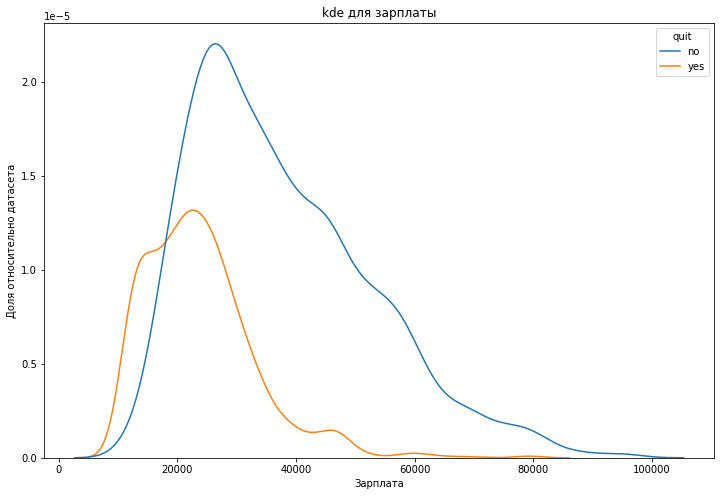

In [75]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_train_quit,
    x='salary',
    hue='quit'
)
ax.set_xlabel('Зарплата')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для зарплаты');

Видно, что у уволившихся и неуволившихся сотрудников средняя зарплата различается примерно на 5000, однако дисперсия у неуволившихся больше.

Посмотрим на уровень загруженности сотрудников, для чего построим две pie-диаграммы, для тех кто уволился и для всех сотрудников.

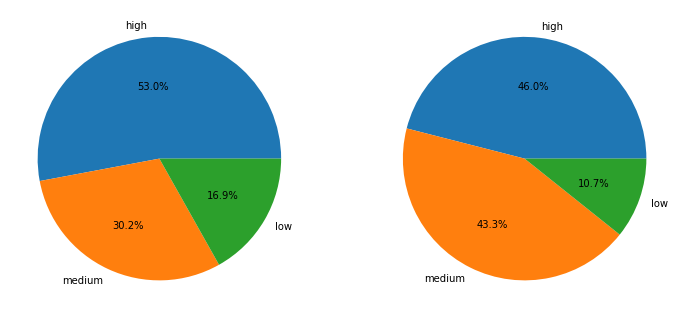

In [76]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(
    df_train_quit['workload'].value_counts(), 
    labels=df_train_quit['workload'].unique(),
    autopct='%1.1f%%',
    radius=1
)
plt.subplot(1, 2, 2)
plt.pie(
    df_train_quit_yes['workload'].value_counts(),  
    labels=df_train_quit['workload'].unique(),
    autopct='%1.1f%%',
    radius=1
);

Найдём долю уволившихся для каждой категории.

In [77]:
for wload in df_train_quit['workload'].unique():
    print('Доля уволившихся для нагрузки ', wload,': ', 
          len(df_train_quit_yes.loc[df_train_quit_yes['workload'] == wload]) / \
          len(df_train_quit.loc[df_train_quit['workload'] == wload]))

Доля уволившихся для нагрузки  high :  0.1795252225519288
Доля уволившихся для нагрузки  medium :  0.23040604343720492
Доля уволившихся для нагрузки  low :  0.429635761589404


Получается больше уволившихся среди тех у кого загрузка небольшая.

Диаграммы показывают, что среди неуволившихся преобладают высокая и низкая загруженность, в то время как у уволившихся средняя. Стоит обратить внимание не на высокую загруженность, а на низкую, среди тех кто уволился её меньше.

Средняя зарплата и уровень загруженности могут говорить о том, что возможно среди тех кто уволился стаж меньше, проверим это.

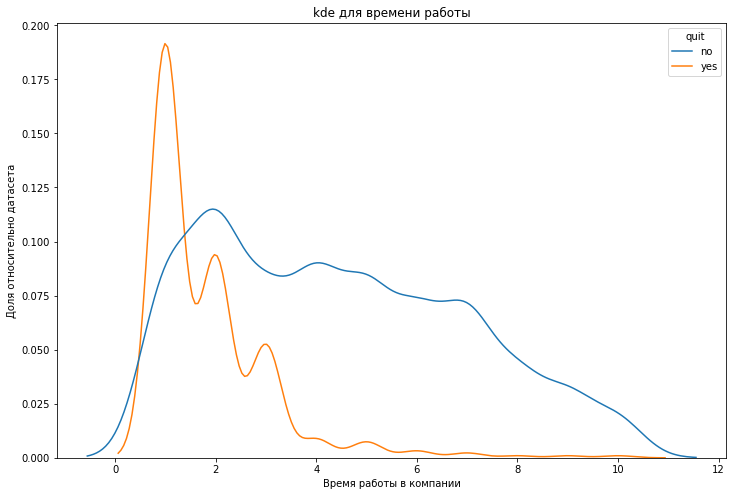

In [78]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_train_quit,
    x='employment_years',
    hue='quit'
)
ax.set_xlabel('Время работы в компании')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для времени работы');

Среди уволившихся больше тех, у кого стаж меньше. Возможно среди уволившихся много молодых сотрудников, проверим это с помощью pie-диаграмм.

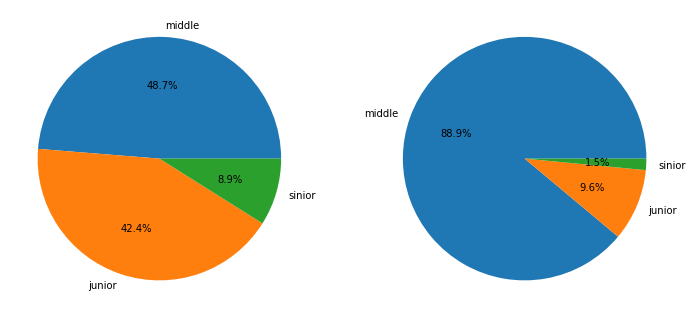

In [79]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(
    df_train_quit['level'].value_counts(), 
    labels=df_train_quit['level'].unique(),
    autopct='%1.1f%%',
    radius=1
)
plt.subplot(1, 2, 2)
plt.pie(
    df_train_quit_yes['level'].value_counts(),  
    labels=df_train_quit['level'].unique(),
    autopct='%1.1f%%',
    radius=1
);

Найдём долю.

In [80]:
for lvl in df_train_quit['level'].unique():
    print('Доля уволившихся для уровня ', lvl,': ', 
          len(df_train_quit_yes.loc[df_train_quit_yes['level'] == lvl]) / \
          len(df_train_quit.loc[df_train_quit['level'] == lvl]))

Доля уволившихся для уровня  middle :  0.06375442739079103
Доля уволившихся для уровня  junior :  0.5146228835300154
Доля уволившихся для уровня  sinior :  0.047619047619047616


Получается среди тех кто уволился больше джунов.

Стоит проверить какую оценку дал руководитель сотруднику, для этого построим гистограммы.

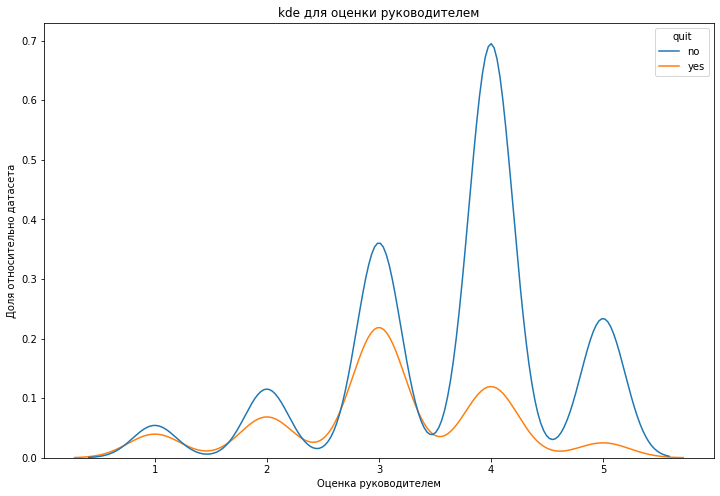

In [81]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_train_quit,
    x='supervisor_evaluation',
    hue='quit'
)
ax.set_xlabel('Оценка руководителем')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для оценки руководителем');

На гистограммах видно, что оценка влияет.

Проверим отделы в которых работают сотрудники с помощью pie-диаграмм.

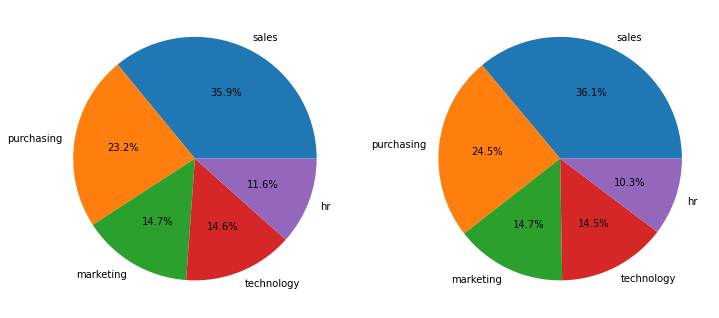

In [82]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(
    df_train_quit['dept'].value_counts(), 
    labels=df_train_quit['dept'].unique(),
    autopct='%1.1f%%',
    radius=1
)
plt.subplot(1, 2, 2)
plt.pie(
    df_train_quit_yes['dept'].value_counts(),  
    labels=df_train_quit['dept'].unique(),
    autopct='%1.1f%%',
    radius=1
);

Найдём долю.

In [83]:
for lvl in df_train_quit['dept'].unique():
    print('Доля уволившихся для отдела ', lvl,': ', 
          len(df_train_quit_yes.loc[df_train_quit_yes['dept'] == lvl]) / \
          len(df_train_quit.loc[df_train_quit['dept'] == lvl]))

Доля уволившихся для отдела  sales :  0.28303198887343534
Доля уволившихся для отдела  purchasing :  0.282312925170068
Доля уволившихся для отдела  marketing :  0.2800687285223368
Доля уволившихся для отдела  technology :  0.2974137931034483
Доля уволившихся для отдела  hr :  0.25


Среди отделов статистика примерно одинаковая, следовательно этот признак не влияет.

Посмотрим было ли повышение среди уволившихся сотрудников

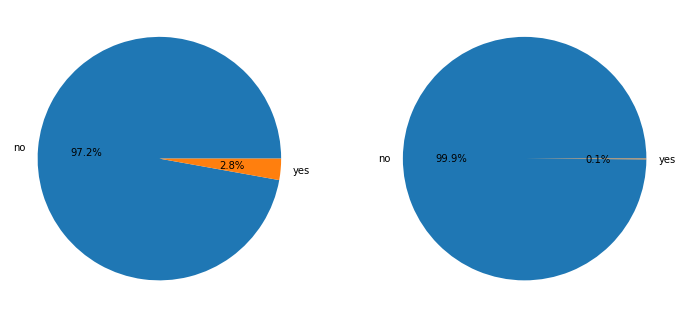

In [84]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(
    df_train_quit['last_year_promo'].value_counts(), 
    labels=df_train_quit['last_year_promo'].unique(),
    autopct='%1.1f%%',
    radius=1
)
plt.subplot(1, 2, 2)
plt.pie(
    df_train_quit_yes['last_year_promo'].value_counts(),  
    labels=df_train_quit['last_year_promo'].unique(),
    autopct='%1.1f%%',
    radius=1
);

Найдём долю.

In [85]:
for lvl in df_train_quit['last_year_promo'].unique():
    print('Доля уволившихся ', lvl,': ', 
          len(df_train_quit_yes.loc[df_train_quit_yes['last_year_promo'] == lvl]) / \
          len(df_train_quit.loc[df_train_quit['last_year_promo'] == lvl]))

Доля уволившихся  no :  0.28994082840236685
Доля уволившихся  yes :  0.008849557522123894


Видно, что мало кто получал повышение, поэтому это влияет.

Посмотрим было ли нарушение трудового договора.

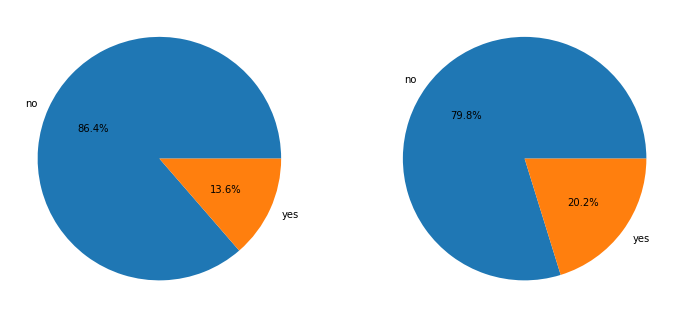

In [86]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(
    df_train_quit['last_year_violations'].value_counts(), 
    labels=df_train_quit['last_year_violations'].unique(),
    autopct='%1.1f%%',
    radius=1
)
plt.subplot(1, 2, 2)
plt.pie(
    df_train_quit_yes['last_year_violations'].value_counts(),  
    labels=df_train_quit['last_year_violations'].unique(),
    autopct='%1.1f%%',
    radius=1
);

Найдём долю.

In [87]:
for lvl in df_train_quit['last_year_violations'].unique():
    print(lvl,': ', 
          len(df_train_quit_yes.loc[df_train_quit_yes['last_year_violations'] == lvl]) / \
          len(df_train_quit.loc[df_train_quit['last_year_violations'] == lvl]))

no :  0.26049204052098407
yes :  0.41834862385321103


Те кто увольнялся нарушал трудовой договор чаще. 

Получается портрет уволившегося сотрудника это мидл, который получает не очень много, при этом нагрузка его рабочего процесса средняя.

Перечислим признаки, которые влияют на то уволится сотрудник или нет:
1. Зарплата
2. Загруженность
3. Стаж
4. Уровень
5. Оценка руководителем
6. Наличие повышения
7. Наличие нарушения трудового договора.

### Проверка удовлетворённости сотрудника

Построим гистограммы удовлетворённости сотрудников работой на тестовой выборке.

In [88]:
df_2 = df_test_target_quit.join(
    df_test_target_job_satisfaction_rate.set_index('id'),
    on=['id'],
    how='inner'
)
df_2.head()

,id,quit,job_satisfaction_rate
0,999029,yes,0.35
1,372846,no,0.21
2,726767,no,0.73
3,490105,no,0.62
4,416898,yes,0.57


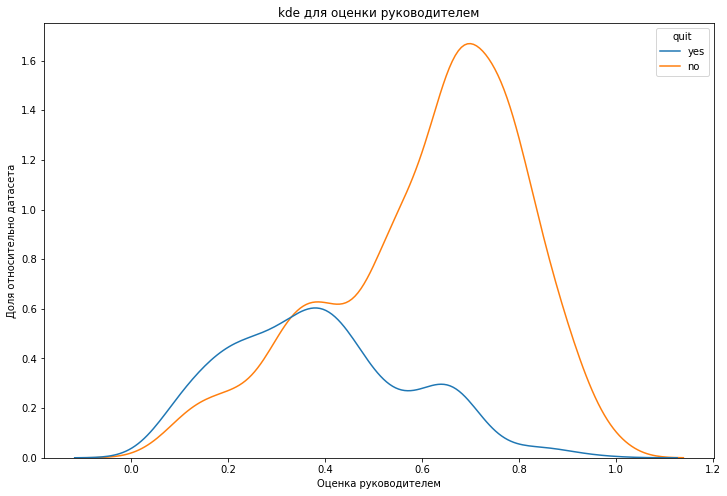

In [89]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=df_2,
    x='job_satisfaction_rate',
    hue='quit'
)
ax.set_xlabel('Оценка руководителем')
ax.set_ylabel('Доля относительно датасета')
plt.title('kde для оценки руководителем');

Гистограммы показывают, что связь действительно есть. Удовлетворённые сотрудники увольняются реже.

## Часть 4. Добавление нового признака

Добавим признак job_satisfaction_rate к тренировочной выборке с помощью лучшей модели.

In [90]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [91]:
df_train_quit['job_satisfaction_rate'] = model_tree.predict(df_train_quit.drop(columns=['id', 'quit']))
df_train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.606667
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.821905
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.812500


In [92]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [93]:
df_test_features['job_satisfaction_rate'] = model_tree.predict(df_test_features.drop(columns=['id']))
df_test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.883333
1,686555,hr,junior,medium,1,no,no,4,30000,0.682222
2,467458,sales,middle,low,5,no,no,4,19200,0.683750
3,418655,sales,middle,low,6,no,no,4,19200,0.713333
4,789145,hr,middle,medium,5,no,no,5,40800,0.812500


## Часть 5. Подготовка данных

Выпишем данные, на основе которых будем готовить модель:
1. Зарплата (salary)
2. Загруженность (workload)
3. Стаж (employment_years)
4. Уровень занимаемой должности (level)
5. Оценка руководителем (supervisor_evaluation)
6. Уровень удовлетворённости (job_satisfaction_rate)

Зарплата нам не подходит потому что у неё высокая корреляция с некоторыми признаками.

Составим список признаков для кодировщиков

In [94]:
ohe_columns_2 = ['last_year_promo', 'last_year_violations']
ord_columns_2 = ['workload', 'level']
num_columns_2 = ['supervisor_evaluation', 'job_satisfaction_rate', 'employment_years']

In [95]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

Составим пайплайн для ORD кодировщика.

In [ ]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    df_train_quit['workload'].unique(),
                    df_train_quit['level'].unique()
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Создадим пайплайн для обработки данных

In [ ]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns_2),
     ('ord', ord_pipe, ord_columns_2),
     ('num', MinMaxScaler(), num_columns_2)
    ], 
    remainder='passthrough'
)

Создадим признаки

In [ ]:
X_train_2 = df_train_quit[['workload', 'level', 'supervisor_evaluation', 'job_satisfaction_rate',
                           'employment_years', 'last_year_promo', 'last_year_violations']]
y_train_2 = df_train_quit['quit']

In [ ]:
X_test_2 = df_test_features.sort_values(by='id')
X_test_2 = X_test_2[['workload', 'level', 'supervisor_evaluation', 'job_satisfaction_rate',
                           'employment_years', 'last_year_promo', 'last_year_violations']]

In [ ]:
y_test_2 = df_test_target_quit.sort_values(by='id')
y_test_2 = y_test_2['quit']

Закодируем целевую переменную с помощью LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit_transform(y_train_2)
y_test_22 = le.transform(y_test_2)

In [ ]:
len(df_test_target_quit.loc[df_test_target_quit['quit'] == 'no'])

In [ ]:
len(y_test_22[y_test_22 == 0])

## Часть 6. Составление моделей

Выберем три модели: kNN, SVC и дерево решений, для котовых подберём гиперпараметры.

Общий пайплайн

In [ ]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=42)
    )
])

Пайплайн для моделей

In [ ]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 10),
        'models__min_samples_split': range(2, 10),
        'models__min_samples_leaf': range(1, 10),
        #'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 8),
        #'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=42, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True)],
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'models__degree': range(1, 11),
        #'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
    
]


Пайплайн для метода поиска гиперпараметров.

In [ ]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    n_iter=55
    #error_score='raise'
)

Составление признаков

Поиск лучшей модели

In [ ]:
randomized_search.fit(X_train_2, y_train_2)

Лучшая модель

In [ ]:
best_model = randomized_search.best_estimator_

In [ ]:
randomized_search.best_score_

Составление тестовой выборки

In [ ]:
y_test_2 = df_test_target_quit.sort_values(by='id')
y_test_2 = y_test_2['quit']

In [ ]:
y_test_pred = best_model.predict_proba(X_test_2)[:, 1]
y_test_pred

In [ ]:
roc_auc_score(y_test_2, y_test_pred) 

<br/>
<div class="alert alert-info">
Я менял гиперпараметры, добавлял и убирал новые признаки, даже использовал GridSearchCV, но максимум который мне удалось получить это 0.78. Что я делаю не так?
</div>

## Часть 7. Выводы

Был проведён исследовательский анализ данных, на основе которого удалось составить портрет уволившегося сотрудника. Далее была создана модель машинного обучения, которая предсказывает вероятность увольнения сотрудника, эта модель дерева решений.

# Общий вывод

Было решено две задачи. В первой составлялась модель машинного обучения, которая определяет удовлетворённость сотрудника работой.

Для этой задачи проводился исследовательский анализ данных, после чего была предложена линейная модель и модель дерева решений для задачи регрессии. Первая модель справилась хуже, так как линейные модели подходят не для каждого случая. Модель дерева решений справилась лучше, потому что она позволяет подбирать гиперпараметры. 

Вторая задача представляет собой задачу классификации. На основе исследовательского анализа данных был составлен портрет сотрудника, который желает уволиться, после чего была создана модель машинного обучения, которая предсказывала вероятность увольнения. 



На основе решения второй задачи могу сказать, что компании необходимо больше внимания уделять специалистам джуниор уровня.